<a href="https://www.kaggle.com/vanshikhaangrish/netflix-stock-analysis?scriptVersionId=89935826" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Now some of Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# The Data

In [2]:
df= pd.DataFrame(pd.read_csv("../input/netflix-stock-price-prediction/NFLX.csv"))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

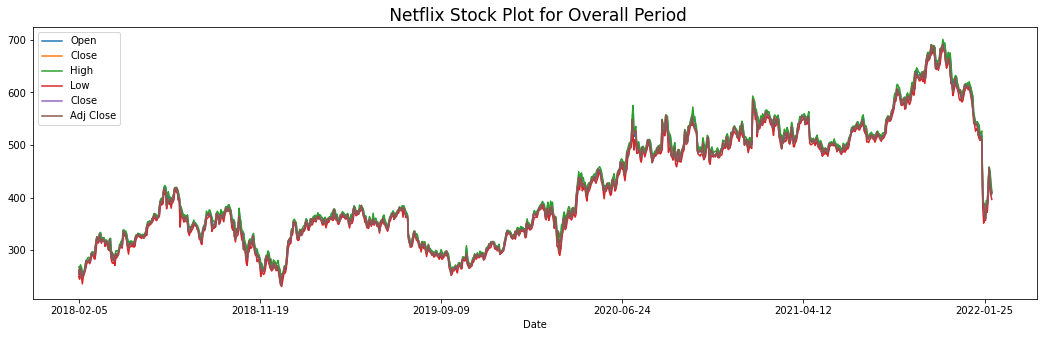

In [4]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

# Top-5 Dates with Highest Stock Price

In [5]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

# Top-5 Dates with Lowest Stock Price

In [6]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

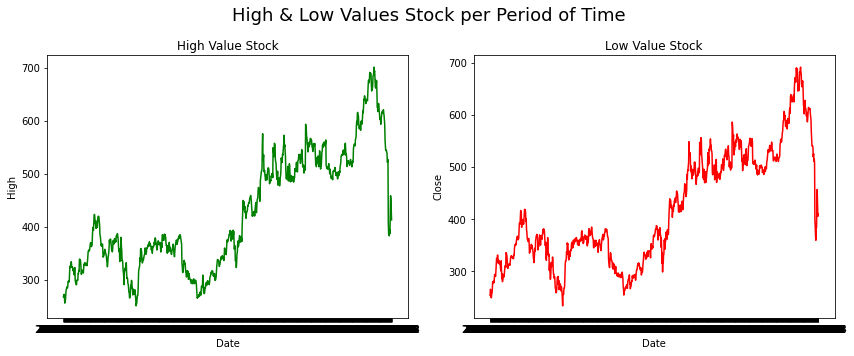

In [7]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

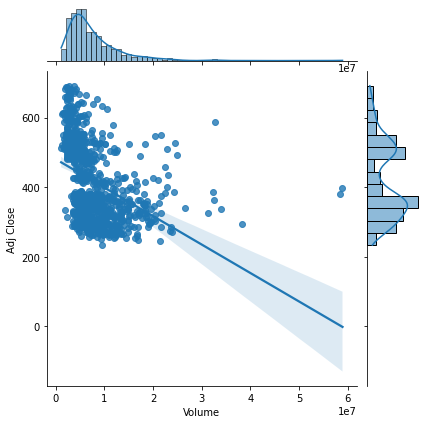

In [8]:
sns.jointplot(x='Volume', y='Adj Close', data=df, kind='reg')

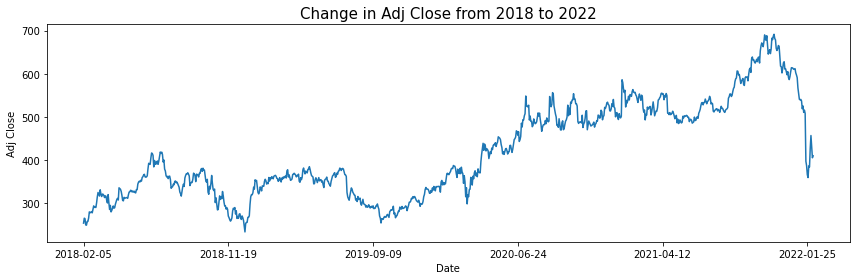

In [9]:
plt.figure(figsize=(12,4))
df['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()

# Netflix Stock Daily Returns

In [10]:
df['Daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519


# Best Day of Stock

In [11]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
2021-01-20    0.168543
Name: Daily_returns, dtype: float64

# Worst day of Stock

In [12]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
2022-01-21   -0.217905
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

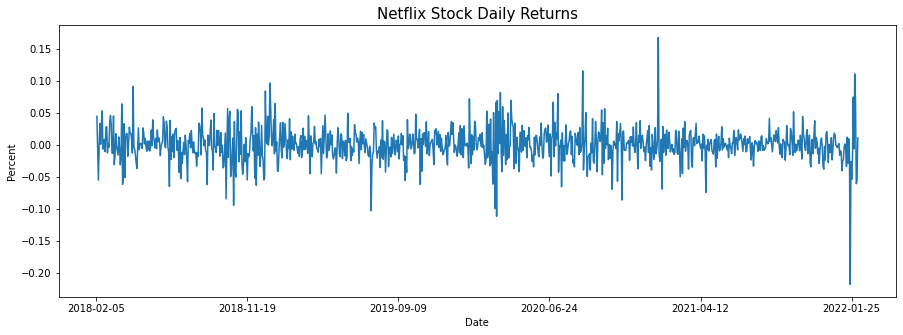

In [13]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

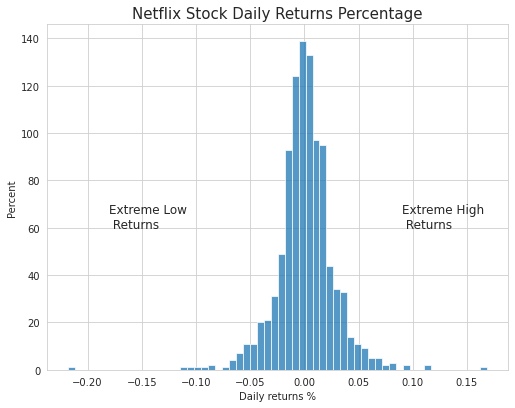

In [14]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()


# Netflix Stock Cumulative Returns

In [15]:
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072,1.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366,1.040510
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657,0.983639
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519,0.981161


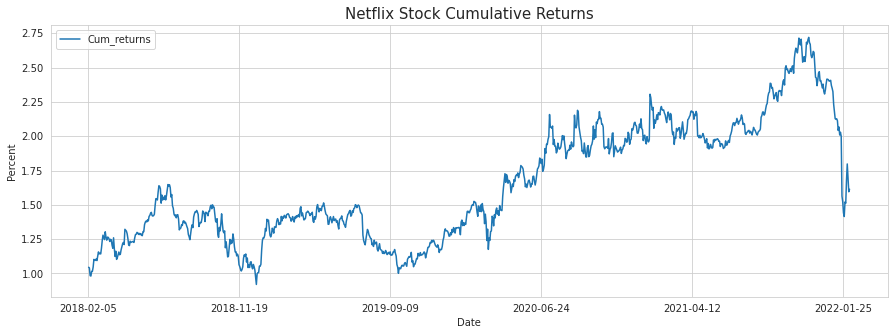

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df['Cum_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Cumulative Returns",fontsize= 15 )
plt.legend()

# Moving Average of Stock

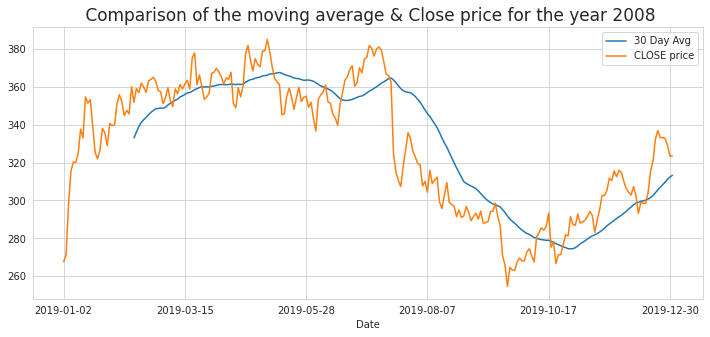

In [17]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
df['Close'].loc['2019-01-01': '2019-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2019-01-01':'2019-12-31'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for the year 2008", fontsize=17)
plt.legend()

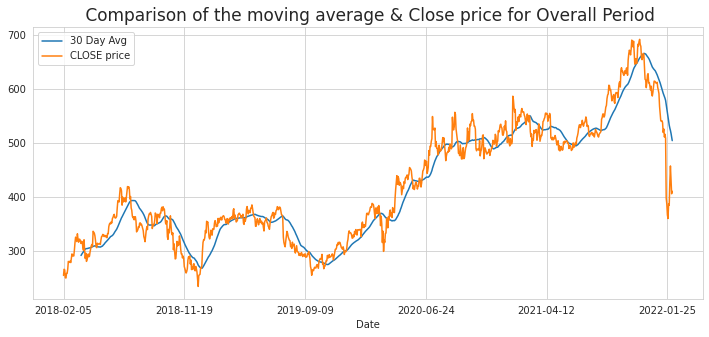

In [18]:
f= plt.figure(figsize=(12,5))
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

In [19]:
df['Mean Avg 30Day'] = df['Close'].rolling(window=30).mean() # MA= mean Average
df['STD 30Day'] = df['Close'].rolling(window=30).std()

In [20]:
df['Upper Band']= df['Mean Avg 30Day'] + (df['STD 30Day'] *2)
df['Lower Band']= df['Mean Avg 30Day'] - (df['STD 30Day'] *2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns,Mean Avg 30Day,STD 30Day,Upper Band,Lower Band
Date,,,,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072,1.045072,NaN,NaN,NaN,NaN
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366,1.040510,NaN,NaN,NaN,NaN
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657,0.983639,NaN,NaN,NaN,NaN
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519,0.981161,NaN,NaN,NaN,NaN


Text(0.5, 1.0, ' Bollinger Band Plot for Overall Period')

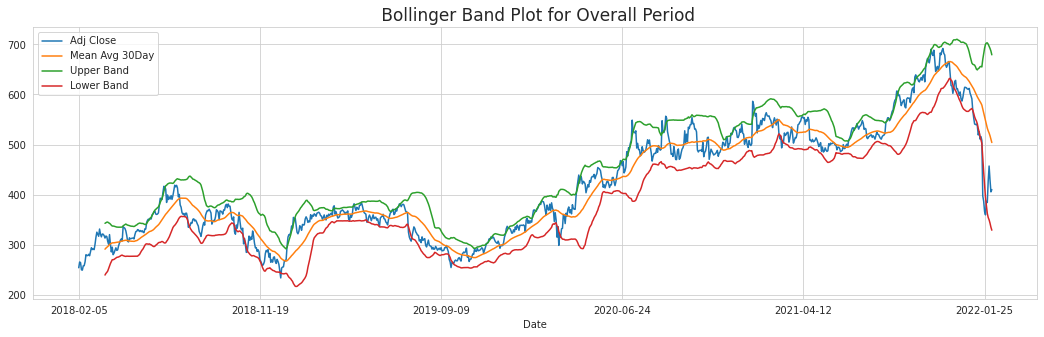

In [21]:
df[['Adj Close', 'Mean Avg 30Day', 'Upper Band', 'Lower Band']].plot(figsize=(18,5))
plt.title(" Bollinger Band Plot for Overall Period", fontsize=17)